## Código

In [1]:
# librerias para implementar los modelos de ML
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# librerias auxiliares
import numpy as np
import matplotlib.pyplot as plt

Recuerden que la regresión polinomial en una variable tiene la forma:
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 +...+\theta_nx^n  $$

In [2]:
X = np.arange(-10,10.2,0.2)
y = 1+X+2*X**2+3*X**3 # x

In [ ]:
plt.plot(X,y)
plt.show()

Vamos a empezar definiendo el modelo polinomial con la función `PolynomialFeatures`. De [su documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures) en scikit learn:


> Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].


Creamos la instancia del transformador, y después *ajustamos* y *transformamos* los datos.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.3, 
                                                    random_state=42)

In [28]:
poly = PolynomialFeatures(degree=1, include_bias=False)

In [29]:
poly.fit(X.reshape(-1, 1))

PolynomialFeatures(degree=1, include_bias=False)

In [ ]:
poly.transform(X.reshape(-1, 1))

In [30]:
poly_features_train = poly.fit_transform(X_train.reshape(-1, 1))

In [31]:
poly_features_test = poly.fit_transform(X_test.reshape(-1, 1))

Realizamos nuestras particiones de prueba y entrenamiento:

Declaramos nuestro método:

In [32]:
poly_reg_model = LinearRegression()

In [33]:
poly_reg_model.fit(poly_features_train, y_train)

LinearRegression()

In [ ]:
y_pred = poly_reg_model.predict(poly_features_test)
y_pred

In [35]:
error = mean_squared_error(y_test, y_pred)
error

222095.39597383392

In [24]:
X_test.shape

(31,)

In [16]:
y_test.shape

(31,)

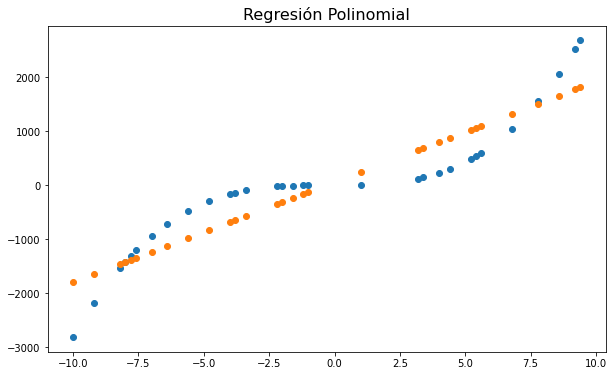

In [36]:
plt.figure(figsize=(10, 6))
plt.title("Regresión Polinomial", size=16)
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)
plt.show()

## Actividades

**Actividad #1**: Dibujar, con Python, la gráfica del Error Cuadrático Medio generado al iterar el grado $d$ del polinomio entre 1 y 10. Obtener los valores de $\theta$ que determina el modelo de regresión polinomial para cada valor de $d$.

**Actividad 2**: En lugar de usar regresión lineal, utilizen regresión [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) en scikit learn, y obtengan lo que se pide en la actividad 1.

**Actividad 3:** De las gráficas anteriores, ¿cual sería el valor óptimo (a ojo de buen cubero) para $d$? ¿Notan alguna diferencia entre ambos modelos de regresión?